In [1]:
import sys, os
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
matplotlib.rc('text',usetex=True)
%matplotlib inline
import tmdlib.tmd as tmd

# Load fit results

In [2]:
par = {}
par['world'] = pd.read_csv('outputcollins/out-world.dat', delim_whitespace=True, index_col=False)
par['sbs'] = pd.read_csv('outputcollins/out-sbs.dat', delim_whitespace=True, index_col=False)
par['clas'] = pd.read_csv('outputcollins/out-clas.dat', delim_whitespace=True, index_col=False)
par['sbs+clas'] = pd.read_csv('outputcollins/out-sbsclas.dat', delim_whitespace=True, index_col=False)
par['base'] = pd.read_csv('outputcollins/out-base.dat', delim_whitespace=True, index_col=False)
par['basesyst'] = pd.read_csv('outputcollins/out-basesyst.dat', delim_whitespace=True, index_col=False)
par['enhanced'] = pd.read_csv('outputcollins/out-enhanced.dat', delim_whitespace=True, index_col=False)
par['enhancedsyst'] = pd.read_csv('outputcollins/out-enhancedsyst.dat', delim_whitespace=True, index_col=False)
par['sbs+clas+base'] = pd.read_csv('outputcollins/out-sbsclasbase.dat', delim_whitespace=True, index_col=False)
par['sbs+clas+basesyst'] = pd.read_csv('outputcollins/out-sbsclasbasesyst.dat', delim_whitespace=True, index_col=False)
par['sbs+clas+enhanced'] = pd.read_csv('outputcollins/out-sbsclasenhanced.dat', delim_whitespace=True, index_col=False)
par['sbs+clas+enhancedsyst'] = pd.read_csv('outputcollins/out-sbsclasenhancedsyst.dat', delim_whitespace=True, index_col=False)
par['base3he'] = pd.read_csv('outputcollins/out-base3he.dat', delim_whitespace=True, index_col=False)
par['base3hesyst'] = pd.read_csv('outputcollins/out-base3hesyst.dat', delim_whitespace=True, index_col=False)
par['enhanced3he'] = pd.read_csv('outputcollins/out-enhanced3he.dat', delim_whitespace=True, index_col=False)
par['enhanced3hesyst'] = pd.read_csv('outputcollins/out-enhanced3hesyst.dat', delim_whitespace=True, index_col=False)

# Calculate h1

In [3]:
def h1calc(pset,Q2,tol):
    xh1 = pd.DataFrame(columns={})
    X = np.linspace(1e-3,1,200)
    for x in X:
        xu = []
        xd = []
        ratio = []
        for i in range(len(pset)):
            h1 = tmd.h1col(x,Q2,'proton',pset.loc[i])
            xu.append(x*h1[2])
            xd.append(x*h1[1])
            ratio.append(h1[1]/h1[2])
        xh1 = xh1.append({'x':x,'xu':np.mean(xu),'Exu':tol*np.std(xu),'xd':np.mean(xd),'Exd':tol*np.std(xd), "d/u":np.mean(ratio), "Ed/u":tol*np.std(ratio)},ignore_index=True)
    return xh1

In [4]:
Q2 = 2.4
tol=7.04

h1 = {}
h1['world'] = h1calc(par['world'],Q2,tol)
h1['sbs'] = h1calc(par['sbs'],Q2,tol)
h1['clas'] = h1calc(par['clas'],Q2,tol)
h1['sbs+clas'] = h1calc(par['sbs+clas'],Q2,tol)
h1['base'] = h1calc(par['base'],Q2,tol)
h1['basesyst'] = h1calc(par['basesyst'],Q2,tol)
h1['enhanced'] = h1calc(par['enhanced'],Q2,tol)
h1['enhancedsyst'] = h1calc(par['enhancedsyst'],Q2,tol)
h1['sbs+clas+base'] = h1calc(par['sbs+clas+base'],Q2,tol)
h1['sbs+clas+basesyst'] = h1calc(par['sbs+clas+basesyst'],Q2,tol)
h1['sbs+clas+enhanced'] = h1calc(par['sbs+clas+enhanced'],Q2,tol)
h1['sbs+clas+enhancedsyst'] = h1calc(par['sbs+clas+enhancedsyst'],Q2,tol)
h1['base3he'] = h1calc(par['base3he'],Q2,tol)
h1['base3hesyst'] = h1calc(par['base3hesyst'],Q2,tol)
h1['enhanced3he'] = h1calc(par['enhanced3he'],Q2,tol)
h1['enhanced3hesyst'] = h1calc(par['enhanced3hesyst'],Q2,tol)



<ipython-input-3-874679637803>:12: RuntimeWarning: invalid value encountered in double_scalars
  ratio.append(h1[1]/h1[2])


# Plots

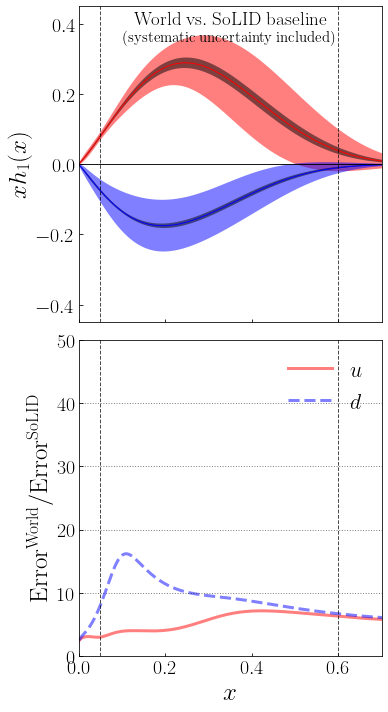

In [6]:
nrows, ncols = 2, 1

fig = plt.figure(figsize=(ncols*5.5,nrows*5))

data1, data2 = h1['world'], h1['basesyst']
ylabel = r'$\rm Error^{World}/Error^{SoLID}$'
title1 = r'$\rm World~vs.~SoLID~baseline$'
title2 = r'$\rm (systematic~uncertainty~included)$'

ax = fig.add_subplot(nrows, ncols, 1)
ax.fill_between(data1['x'], data1['xu']-data1['Exu'], data1['xu']+data1['Exu'],\
               color='red', alpha=0.5, linewidth=0)
ax.fill_between(data1['x'], data1['xd']-data1['Exd'], data1['xd']+data1['Exd'],\
               color='blue', alpha=0.5, linewidth=0)
ax.fill_between(data2['x'], data2['xu']-data2['Exu'], data2['xu']+data2['Exu'],\
               color='black', alpha=0.5, linewidth=0)
ax.fill_between(data2['x'], data2['xd']-data2['Exd'], data2['xd']+data2['Exd'],\
               color='black', alpha=0.5, linewidth=0)
ax.plot(data2['x'], data2['xu'], color='red', linewidth=1)
ax.plot(data2['x'], data2['xd'], color='blue', linewidth=1)
ax.axhline(y=0, linestyle='-', color='black', alpha=0.9, linewidth=1)
ax.axvline(x=0.05, linestyle='--', color='black', alpha=0.7, linewidth=1)
ax.axvline(x=0.60, linestyle='--', color='black', alpha=0.7, linewidth=1)
ax.set_ylabel(r'$xh_1(x)$', size=25)
ax.set_xlim(0,0.7)
ax.set_ylim(-0.45,0.45)
#ax.set_xticks([0,0.2,0.4,0.6,0.8,1.0])
ax.set_xticklabels([])
ax.tick_params(axis='both', which='both', direction='in', labelsize=20)
ax.text(0.5, 0.96, title1, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=19)
ax.text(0.5, 0.90, title2, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=15)


ax = fig.add_subplot(nrows, ncols, 2)
ax.plot(data1['x'], data1['Exu']/data2['Exu'], color='red', alpha=0.5, linestyle='-', linewidth=3, label=r'$u$')
ax.plot(data1['x'], data1['Exd']/data2['Exd'], color='blue', alpha=0.5, linestyle='--', linewidth=3, label=r'$d$')
ax.axhline(y=10, linestyle=':', color='black', alpha=0.5, linewidth=1)
ax.axhline(y=20, linestyle=':', color='black', alpha=0.5, linewidth=1)
ax.axhline(y=30, linestyle=':', color='black', alpha=0.5, linewidth=1)
ax.axhline(y=40, linestyle=':', color='black', alpha=0.5, linewidth=1)
ax.axvline(x=0.05, linestyle='--', color='black', alpha=0.7, linewidth=1)
ax.axvline(x=0.60, linestyle='--', color='black', alpha=0.7, linewidth=1)
ax.set_xlabel(r'$x$', size=25)
ax.set_ylabel(ylabel, size=25)
ax.set_xlim(0,0.7)
ax.set_ylim(0,50)
#ax.set_xticks([0,0.2,0.4,0.6,0.8,1.0])
ax.tick_params(axis='both', which='both', direction='in', labelsize=20)
ax.legend(loc='upper right', frameon=False, fontsize=22)

fig.tight_layout()
fig.savefig('gallary/trans-world-basesyst.pdf')

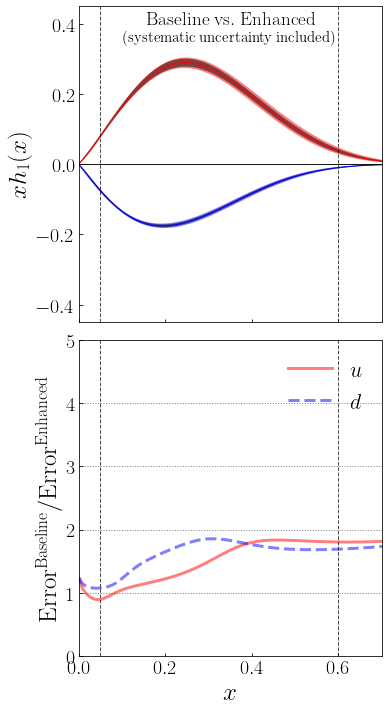

In [7]:
nrows, ncols = 2, 1

fig = plt.figure(figsize=(ncols*5.5,nrows*5))

data1, data2 = h1['basesyst'], h1['enhancedsyst']
ylabel = r'$\rm Error^{Baseline}/Error^{Enhanced}$'
title1 = r'$\rm Baseline~vs.~Enhanced$'
title2 = r'$\rm (systematic~uncertainty~included)$'


ax = fig.add_subplot(nrows, ncols, 1)
ax.fill_between(data1['x'], data1['xu']-data1['Exu'], data1['xu']+data1['Exu'],\
               color='red', alpha=0.5, linewidth=0)
ax.fill_between(data1['x'], data1['xd']-data1['Exd'], data1['xd']+data1['Exd'],\
               color='blue', alpha=0.5, linewidth=0)
ax.fill_between(data2['x'], data2['xu']-data2['Exu'], data2['xu']+data2['Exu'],\
               color='black', alpha=0.5, linewidth=0)
ax.fill_between(data2['x'], data2['xd']-data2['Exd'], data2['xd']+data2['Exd'],\
               color='black', alpha=0.5, linewidth=0)
ax.plot(data2['x'], data2['xu'], color='red', linewidth=1)
ax.plot(data2['x'], data2['xd'], color='blue', linewidth=1)
ax.axhline(y=0, linestyle='-', color='black', alpha=0.9, linewidth=1)
ax.axvline(x=0.05, linestyle='--', color='black', alpha=0.7, linewidth=1)
ax.axvline(x=0.60, linestyle='--', color='black', alpha=0.7, linewidth=1)
ax.set_ylabel(r'$xh_1(x)$', size=25)
ax.set_xlim(0,0.7)
ax.set_ylim(-0.45,0.45)
#ax.set_xticks([0,0.2,0.4,0.6,0.8,1.0])
ax.set_xticklabels([])
ax.tick_params(axis='both', which='both', direction='in', labelsize=20)
ax.text(0.5, 0.96, title1, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=19)
ax.text(0.5, 0.90, title2, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=15)

ax = fig.add_subplot(nrows, ncols, 2)
ax.plot(data1['x'], data1['Exu']/data2['Exu'], color='red', alpha=0.5, linestyle='-', linewidth=3, label=r'$u$')
ax.plot(data1['x'], data1['Exd']/data2['Exd'], color='blue', alpha=0.5, linestyle='--', linewidth=3, label=r'$d$')
ax.axhline(y=1, linestyle=':', color='black', alpha=0.5, linewidth=1)
ax.axhline(y=2, linestyle=':', color='black', alpha=0.5, linewidth=1)
ax.axhline(y=3, linestyle=':', color='black', alpha=0.5, linewidth=1)
ax.axhline(y=4, linestyle=':', color='black', alpha=0.5, linewidth=1)
ax.axvline(x=0.05, linestyle='--', color='black', alpha=0.7, linewidth=1)
ax.axvline(x=0.60, linestyle='--', color='black', alpha=0.7, linewidth=1)
ax.set_xlabel(r'$x$', size=25)
ax.set_ylabel(ylabel, size=25)
ax.set_xlim(0,0.7)
ax.set_ylim(0,5)
#ax.set_xticks([0,0.2,0.4,0.6,0.8,1.0])
ax.tick_params(axis='both', which='both', direction='in', labelsize=20)
ax.legend(loc='upper right', frameon=False, fontsize=22)

fig.tight_layout()
fig.savefig('gallary/trans-basesyst-enhancedsyst.pdf')

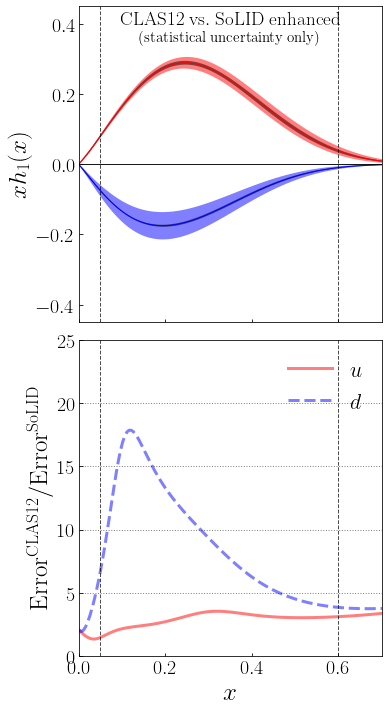

In [8]:
nrows, ncols = 2, 1

fig = plt.figure(figsize=(ncols*5.5,nrows*5))

data1, data2 = h1['clas'], h1['enhanced']
ylabel = r'$\rm Error^{CLAS12}/Error^{SoLID}$'
title1 = r'$\rm CLAS12~vs.~SoLID~enhanced$'
title2 = r'$\rm (statistical~uncertainty~only)$'

ax = fig.add_subplot(nrows, ncols, 1)
ax.fill_between(data1['x'], data1['xu']-data1['Exu'], data1['xu']+data1['Exu'],\
               color='red', alpha=0.5, linewidth=0)
ax.fill_between(data1['x'], data1['xd']-data1['Exd'], data1['xd']+data1['Exd'],\
               color='blue', alpha=0.5, linewidth=0)
ax.fill_between(data2['x'], data2['xu']-data2['Exu'], data2['xu']+data2['Exu'],\
               color='black', alpha=0.5, linewidth=0)
ax.fill_between(data2['x'], data2['xd']-data2['Exd'], data2['xd']+data2['Exd'],\
               color='black', alpha=0.5, linewidth=0)
ax.plot(data2['x'], data2['xu'], color='red', linewidth=1)
ax.plot(data2['x'], data2['xd'], color='blue', linewidth=1)
ax.axhline(y=0, linestyle='-', color='black', alpha=0.9, linewidth=1)
ax.axvline(x=0.05, linestyle='--', color='black', alpha=0.7, linewidth=1)
ax.axvline(x=0.60, linestyle='--', color='black', alpha=0.7, linewidth=1)
ax.set_ylabel(r'$xh_1(x)$', size=25)
ax.set_xlim(0,0.7)
ax.set_ylim(-0.45,0.45)
#ax.set_xticks([0,0.2,0.4,0.6,0.8,1.0])
ax.set_xticklabels([])
ax.tick_params(axis='both', which='both', direction='in', labelsize=20)
ax.text(0.5, 0.96, title1, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=19)
ax.text(0.5, 0.90, title2, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=15)



ax = fig.add_subplot(nrows, ncols, 2)
ax.plot(data1['x'], data1['Exu']/data2['Exu'], color='red', alpha=0.5, linestyle='-', linewidth=3, label=r'$u$')
ax.plot(data1['x'], data1['Exd']/data2['Exd'], color='blue', alpha=0.5, linestyle='--', linewidth=3, label=r'$d$')
ax.axhline(y=5, linestyle=':', color='black', alpha=0.5, linewidth=1)
ax.axhline(y=10, linestyle=':', color='black', alpha=0.5, linewidth=1)
ax.axhline(y=15, linestyle=':', color='black', alpha=0.5, linewidth=1)
ax.axhline(y=20, linestyle=':', color='black', alpha=0.5, linewidth=1)
ax.axvline(x=0.05, linestyle='--', color='black', alpha=0.7, linewidth=1)
ax.axvline(x=0.60, linestyle='--', color='black', alpha=0.7, linewidth=1)
ax.set_xlabel(r'$x$', size=25)
ax.set_ylabel(ylabel, size=25)
ax.set_xlim(0,0.7)
ax.set_ylim(0,25)
#ax.set_xticks([0,0.2,0.4,0.6,0.8,1.0])
ax.tick_params(axis='both', which='both', direction='in', labelsize=20)
ax.legend(loc='upper right', frameon=False, fontsize=22)

fig.tight_layout()
fig.savefig('gallary/trans-clas-enhanced.pdf')

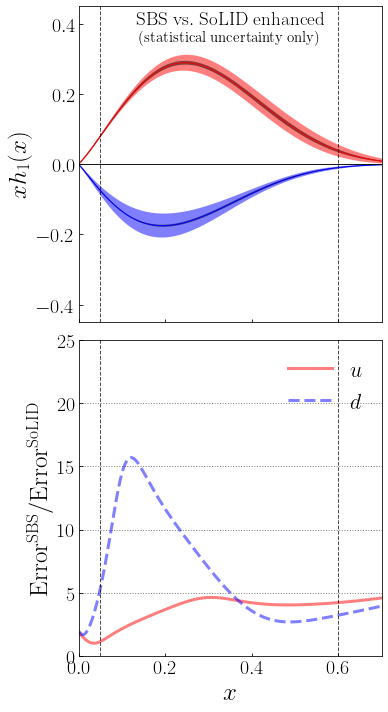

In [9]:
nrows, ncols = 2, 1

fig = plt.figure(figsize=(ncols*5.5,nrows*5))

data1, data2 = h1['sbs'], h1['enhanced']
ylabel = r'$\rm Error^{SBS}/Error^{SoLID}$'
title1 = r'$\rm SBS~vs.~SoLID~enhanced$'
title2 = r'$\rm (statistical~uncertainty~only)$'

ax = fig.add_subplot(nrows, ncols, 1)
ax.fill_between(data1['x'], data1['xu']-data1['Exu'], data1['xu']+data1['Exu'],\
               color='red', alpha=0.5, linewidth=0)
ax.fill_between(data1['x'], data1['xd']-data1['Exd'], data1['xd']+data1['Exd'],\
               color='blue', alpha=0.5, linewidth=0)
ax.fill_between(data2['x'], data2['xu']-data2['Exu'], data2['xu']+data2['Exu'],\
               color='black', alpha=0.5, linewidth=0)
ax.fill_between(data2['x'], data2['xd']-data2['Exd'], data2['xd']+data2['Exd'],\
               color='black', alpha=0.5, linewidth=0)
ax.plot(data2['x'], data2['xu'], color='red', linewidth=1)
ax.plot(data2['x'], data2['xd'], color='blue', linewidth=1)
ax.axhline(y=0, linestyle='-', color='black', alpha=0.9, linewidth=1)
ax.axvline(x=0.05, linestyle='--', color='black', alpha=0.7, linewidth=1)
ax.axvline(x=0.60, linestyle='--', color='black', alpha=0.7, linewidth=1)
ax.set_ylabel(r'$xh_1(x)$', size=25)
ax.set_xlim(0,0.7)
ax.set_ylim(-0.45,0.45)
#ax.set_xticks([0,0.2,0.4,0.6,0.8,1.0])
ax.set_xticklabels([])
ax.tick_params(axis='both', which='both', direction='in', labelsize=20)
ax.text(0.5, 0.96, title1, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=19)
ax.text(0.5, 0.90, title2, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=15)



ax = fig.add_subplot(nrows, ncols, 2)
ax.plot(data1['x'], data1['Exu']/data2['Exu'], color='red', alpha=0.5, linestyle='-', linewidth=3, label=r'$u$')
ax.plot(data1['x'], data1['Exd']/data2['Exd'], color='blue', alpha=0.5, linestyle='--', linewidth=3, label=r'$d$')
ax.axhline(y=5, linestyle=':', color='black', alpha=0.5, linewidth=1)
ax.axhline(y=10, linestyle=':', color='black', alpha=0.5, linewidth=1)
ax.axhline(y=15, linestyle=':', color='black', alpha=0.5, linewidth=1)
ax.axhline(y=20, linestyle=':', color='black', alpha=0.5, linewidth=1)
ax.axvline(x=0.05, linestyle='--', color='black', alpha=0.7, linewidth=1)
ax.axvline(x=0.60, linestyle='--', color='black', alpha=0.7, linewidth=1)
ax.set_xlabel(r'$x$', size=25)
ax.set_ylabel(ylabel, size=25)
ax.set_xlim(0,0.7)
ax.set_ylim(0,25)
#ax.set_xticks([0,0.2,0.4,0.6,0.8,1.0])
ax.tick_params(axis='both', which='both', direction='in', labelsize=20)
ax.legend(loc='upper right', frameon=False, fontsize=22)

fig.tight_layout()
fig.savefig('gallary/trans-sbs-enhanced.pdf')

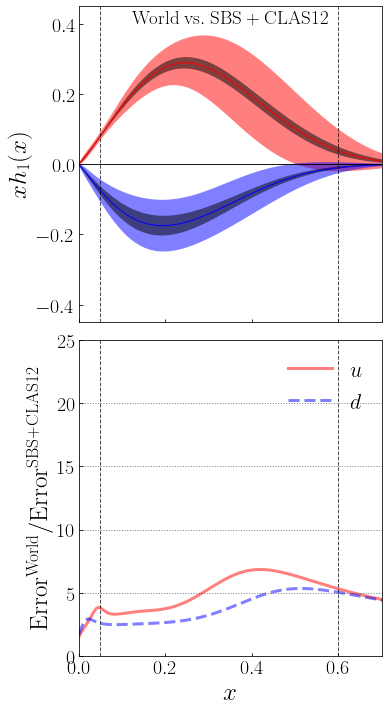

In [10]:
nrows, ncols = 2, 1

fig = plt.figure(figsize=(ncols*5.5,nrows*5))

data1, data2 = h1['world'], h1['sbs+clas']
ylabel = r'$\rm Error^{World}/Error^{SBS+CLAS12}$'
title1 = r'$\rm World~vs.~SBS+CLAS12$'
title2 = r'$\rm $'

ax = fig.add_subplot(nrows, ncols, 1)
ax.fill_between(data1['x'], data1['xu']-data1['Exu'], data1['xu']+data1['Exu'],\
               color='red', alpha=0.5, linewidth=0)
ax.fill_between(data1['x'], data1['xd']-data1['Exd'], data1['xd']+data1['Exd'],\
               color='blue', alpha=0.5, linewidth=0)
ax.fill_between(data2['x'], data2['xu']-data2['Exu'], data2['xu']+data2['Exu'],\
               color='black', alpha=0.5, linewidth=0)
ax.fill_between(data2['x'], data2['xd']-data2['Exd'], data2['xd']+data2['Exd'],\
               color='black', alpha=0.5, linewidth=0)
ax.plot(data2['x'], data2['xu'], color='red', linewidth=1)
ax.plot(data2['x'], data2['xd'], color='blue', linewidth=1)
ax.axhline(y=0, linestyle='-', color='black', alpha=0.9, linewidth=1)
ax.axvline(x=0.05, linestyle='--', color='black', alpha=0.7, linewidth=1)
ax.axvline(x=0.60, linestyle='--', color='black', alpha=0.7, linewidth=1)
ax.set_ylabel(r'$xh_1(x)$', size=25)
ax.set_xlim(0,0.7)
ax.set_ylim(-0.45,0.45)
#ax.set_xticks([0,0.2,0.4,0.6,0.8,1.0])
ax.set_xticklabels([])
ax.tick_params(axis='both', which='both', direction='in', labelsize=20)
ax.text(0.5, 0.96, title1, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=19)
ax.text(0.5, 0.90, title2, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=15)



ax = fig.add_subplot(nrows, ncols, 2)
ax.plot(data1['x'], data1['Exu']/data2['Exu'], color='red', alpha=0.5, linestyle='-', linewidth=3, label=r'$u$')
ax.plot(data1['x'], data1['Exd']/data2['Exd'], color='blue', alpha=0.5, linestyle='--', linewidth=3, label=r'$d$')
ax.axhline(y=5, linestyle=':', color='black', alpha=0.5, linewidth=1)
ax.axhline(y=10, linestyle=':', color='black', alpha=0.5, linewidth=1)
ax.axhline(y=15, linestyle=':', color='black', alpha=0.5, linewidth=1)
ax.axhline(y=20, linestyle=':', color='black', alpha=0.5, linewidth=1)
ax.axvline(x=0.05, linestyle='--', color='black', alpha=0.7, linewidth=1)
ax.axvline(x=0.60, linestyle='--', color='black', alpha=0.7, linewidth=1)
ax.set_xlabel(r'$x$', size=25)
ax.set_ylabel(ylabel, size=25)
ax.set_xlim(0,0.7)
ax.set_ylim(0,25)
#ax.set_xticks([0,0.2,0.4,0.6,0.8,1.0])
ax.tick_params(axis='both', which='both', direction='in', labelsize=20)
ax.legend(loc='upper right', frameon=False, fontsize=22)

fig.tight_layout()
fig.savefig('gallary/trans-world-sbsclas.pdf')

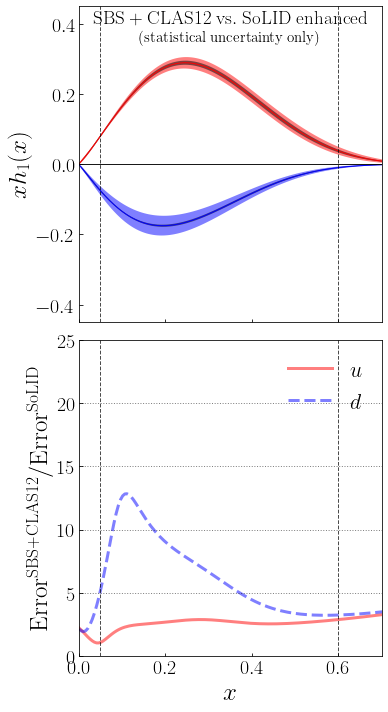

In [11]:
nrows, ncols = 2, 1

fig = plt.figure(figsize=(ncols*5.5,nrows*5))

data1, data2 = h1['sbs+clas'], h1['sbs+clas+enhanced']
ylabel = r'$\rm Error^{SBS+CLAS12}/Error^{SoLID}$'
title1 = r'$\rm SBS+CLAS12~vs.~SoLID~enhanced$'
title2 = r'$\rm (statistical~uncertainty~only)$'

ax = fig.add_subplot(nrows, ncols, 1)
ax.fill_between(data1['x'], data1['xu']-data1['Exu'], data1['xu']+data1['Exu'],\
               color='red', alpha=0.5, linewidth=0)
ax.fill_between(data1['x'], data1['xd']-data1['Exd'], data1['xd']+data1['Exd'],\
               color='blue', alpha=0.5, linewidth=0)
ax.fill_between(data2['x'], data2['xu']-data2['Exu'], data2['xu']+data2['Exu'],\
               color='black', alpha=0.5, linewidth=0)
ax.fill_between(data2['x'], data2['xd']-data2['Exd'], data2['xd']+data2['Exd'],\
               color='black', alpha=0.5, linewidth=0)
ax.plot(data2['x'], data2['xu'], color='red', linewidth=1)
ax.plot(data2['x'], data2['xd'], color='blue', linewidth=1)
ax.axhline(y=0, linestyle='-', color='black', alpha=0.9, linewidth=1)
ax.axvline(x=0.05, linestyle='--', color='black', alpha=0.7, linewidth=1)
ax.axvline(x=0.60, linestyle='--', color='black', alpha=0.7, linewidth=1)
ax.set_ylabel(r'$xh_1(x)$', size=25)
ax.set_xlim(0,0.7)
ax.set_ylim(-0.45,0.45)
#ax.set_xticks([0,0.2,0.4,0.6,0.8,1.0])
ax.set_xticklabels([])
ax.tick_params(axis='both', which='both', direction='in', labelsize=20)
ax.text(0.5, 0.96, title1, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=19)
ax.text(0.5, 0.90, title2, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=15)



ax = fig.add_subplot(nrows, ncols, 2)
ax.plot(data1['x'], data1['Exu']/data2['Exu'], color='red', alpha=0.5, linestyle='-', linewidth=3, label=r'$u$')
ax.plot(data1['x'], data1['Exd']/data2['Exd'], color='blue', alpha=0.5, linestyle='--', linewidth=3, label=r'$d$')
ax.axhline(y=5, linestyle=':', color='black', alpha=0.5, linewidth=1)
ax.axhline(y=10, linestyle=':', color='black', alpha=0.5, linewidth=1)
ax.axhline(y=15, linestyle=':', color='black', alpha=0.5, linewidth=1)
ax.axhline(y=20, linestyle=':', color='black', alpha=0.5, linewidth=1)
ax.axvline(x=0.05, linestyle='--', color='black', alpha=0.7, linewidth=1)
ax.axvline(x=0.60, linestyle='--', color='black', alpha=0.7, linewidth=1)
ax.set_xlabel(r'$x$', size=25)
ax.set_ylabel(ylabel, size=25)
ax.set_xlim(0,0.7)
ax.set_ylim(0,25)
#ax.set_xticks([0,0.2,0.4,0.6,0.8,1.0])
ax.tick_params(axis='both', which='both', direction='in', labelsize=20)
ax.legend(loc='upper right', frameon=False, fontsize=22)

fig.tight_layout()
fig.savefig('gallary/trans-sbsclas-sbsclasenhanced.pdf')

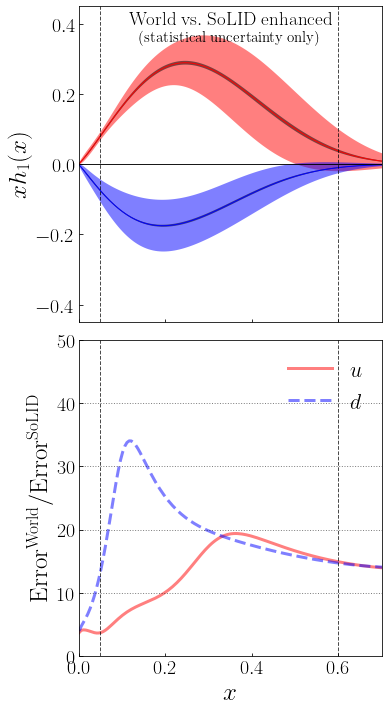

In [14]:
nrows, ncols = 2, 1

fig = plt.figure(figsize=(ncols*5.5,nrows*5))

data1, data2 = h1['world'], h1['enhanced']
ylabel = r'$\rm Error^{World}/Error^{SoLID}$'
title1 = r'$\rm World~vs.~SoLID~enhanced$'
title2 = r'$\rm (statistical~uncertainty~only)$'

ax = fig.add_subplot(nrows, ncols, 1)
ax.fill_between(data1['x'], data1['xu']-data1['Exu'], data1['xu']+data1['Exu'],\
               color='red', alpha=0.5, linewidth=0)
ax.fill_between(data1['x'], data1['xd']-data1['Exd'], data1['xd']+data1['Exd'],\
               color='blue', alpha=0.5, linewidth=0)
ax.fill_between(data2['x'], data2['xu']-data2['Exu'], data2['xu']+data2['Exu'],\
               color='black', alpha=0.5, linewidth=0)
ax.fill_between(data2['x'], data2['xd']-data2['Exd'], data2['xd']+data2['Exd'],\
               color='black', alpha=0.5, linewidth=0)
ax.plot(data2['x'], data2['xu'], color='red', linewidth=1)
ax.plot(data2['x'], data2['xd'], color='blue', linewidth=1)
ax.axhline(y=0, linestyle='-', color='black', alpha=0.9, linewidth=1)
ax.axvline(x=0.05, linestyle='--', color='black', alpha=0.7, linewidth=1)
ax.axvline(x=0.60, linestyle='--', color='black', alpha=0.7, linewidth=1)
ax.set_ylabel(r'$xh_1(x)$', size=25)
ax.set_xlim(0,0.7)
ax.set_ylim(-0.45,0.45)
#ax.set_xticks([0,0.2,0.4,0.6,0.8,1.0])
ax.set_xticklabels([])
ax.tick_params(axis='both', which='both', direction='in', labelsize=20)
ax.text(0.5, 0.96, title1, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=19)
ax.text(0.5, 0.90, title2, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=15)



ax = fig.add_subplot(nrows, ncols, 2)
ax.plot(data1['x'], data1['Exu']/data2['Exu'], color='red', alpha=0.5, linestyle='-', linewidth=3, label=r'$u$')
ax.plot(data1['x'], data1['Exd']/data2['Exd'], color='blue', alpha=0.5, linestyle='--', linewidth=3, label=r'$d$')
ax.axhline(y=10, linestyle=':', color='black', alpha=0.5, linewidth=1)
ax.axhline(y=20, linestyle=':', color='black', alpha=0.5, linewidth=1)
ax.axhline(y=30, linestyle=':', color='black', alpha=0.5, linewidth=1)
ax.axhline(y=40, linestyle=':', color='black', alpha=0.5, linewidth=1)
ax.axvline(x=0.05, linestyle='--', color='black', alpha=0.7, linewidth=1)
ax.axvline(x=0.60, linestyle='--', color='black', alpha=0.7, linewidth=1)
ax.set_xlabel(r'$x$', size=25)
ax.set_ylabel(ylabel, size=25)
ax.set_xlim(0,0.7)
ax.set_ylim(0,50)
#ax.set_xticks([0,0.2,0.4,0.6,0.8,1.0])
ax.tick_params(axis='both', which='both', direction='in', labelsize=20)
ax.legend(loc='upper right', frameon=False, fontsize=22)

fig.tight_layout()
fig.savefig('gallary/trans-world-enhanced.pdf')

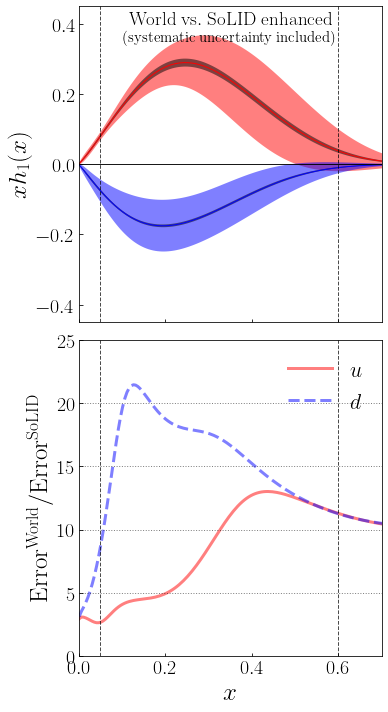

In [15]:
nrows, ncols = 2, 1

fig = plt.figure(figsize=(ncols*5.5,nrows*5))

data1, data2 = h1['world'], h1['enhancedsyst']
ylabel = r'$\rm Error^{World}/Error^{SoLID}$'
title1 = r'$\rm World~vs.~SoLID~enhanced$'
title2 = r'$\rm (systematic~uncertainty~included)$'

ax = fig.add_subplot(nrows, ncols, 1)
ax.fill_between(data1['x'], data1['xu']-data1['Exu'], data1['xu']+data1['Exu'],\
               color='red', alpha=0.5, linewidth=0)
ax.fill_between(data1['x'], data1['xd']-data1['Exd'], data1['xd']+data1['Exd'],\
               color='blue', alpha=0.5, linewidth=0)
ax.fill_between(data2['x'], data2['xu']-data2['Exu'], data2['xu']+data2['Exu'],\
               color='black', alpha=0.5, linewidth=0)
ax.fill_between(data2['x'], data2['xd']-data2['Exd'], data2['xd']+data2['Exd'],\
               color='black', alpha=0.5, linewidth=0)
ax.plot(data2['x'], data2['xu'], color='red', linewidth=1)
ax.plot(data2['x'], data2['xd'], color='blue', linewidth=1)
ax.axhline(y=0, linestyle='-', color='black', alpha=0.9, linewidth=1)
ax.axvline(x=0.05, linestyle='--', color='black', alpha=0.7, linewidth=1)
ax.axvline(x=0.60, linestyle='--', color='black', alpha=0.7, linewidth=1)
ax.set_ylabel(r'$xh_1(x)$', size=25)
ax.set_xlim(0,0.7)
ax.set_ylim(-0.45,0.45)
#ax.set_xticks([0,0.2,0.4,0.6,0.8,1.0])
ax.set_xticklabels([])
ax.tick_params(axis='both', which='both', direction='in', labelsize=20)
ax.text(0.5, 0.96, title1, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=19)
ax.text(0.5, 0.90, title2, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=15)



ax = fig.add_subplot(nrows, ncols, 2)
ax.plot(data1['x'], data1['Exu']/data2['Exu'], color='red', alpha=0.5, linestyle='-', linewidth=3, label=r'$u$')
ax.plot(data1['x'], data1['Exd']/data2['Exd'], color='blue', alpha=0.5, linestyle='--', linewidth=3, label=r'$d$')
ax.axhline(y=5, linestyle=':', color='black', alpha=0.5, linewidth=1)
ax.axhline(y=10, linestyle=':', color='black', alpha=0.5, linewidth=1)
ax.axhline(y=15, linestyle=':', color='black', alpha=0.5, linewidth=1)
ax.axhline(y=20, linestyle=':', color='black', alpha=0.5, linewidth=1)
ax.axvline(x=0.05, linestyle='--', color='black', alpha=0.7, linewidth=1)
ax.axvline(x=0.60, linestyle='--', color='black', alpha=0.7, linewidth=1)
ax.set_xlabel(r'$x$', size=25)
ax.set_ylabel(ylabel, size=25)
ax.set_xlim(0,0.7)
ax.set_ylim(0,25)
#ax.set_xticks([0,0.2,0.4,0.6,0.8,1.0])
ax.tick_params(axis='both', which='both', direction='in', labelsize=20)
ax.legend(loc='upper right', frameon=False, fontsize=22)

fig.tight_layout()
fig.savefig('gallary/trans-world-enhancedsyst.pdf')

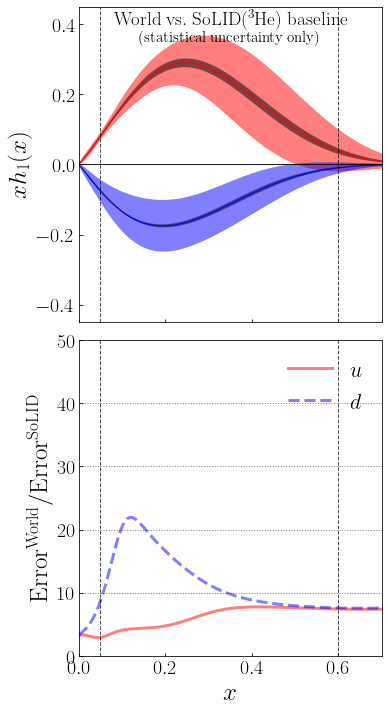

In [7]:
nrows, ncols = 2, 1

fig = plt.figure(figsize=(ncols*5.5,nrows*5))

data1, data2 = h1['world'], h1['base3he']
ylabel = r'$\rm Error^{World}/Error^{SoLID}$'
title1 = r'$\rm World~vs.~SoLID(^{3}He)~baseline$'
title2 = r'$\rm (statistical~uncertainty~only)$'

ax = fig.add_subplot(nrows, ncols, 1)
ax.fill_between(data1['x'], data1['xu']-data1['Exu'], data1['xu']+data1['Exu'],\
               color='red', alpha=0.5, linewidth=0)
ax.fill_between(data1['x'], data1['xd']-data1['Exd'], data1['xd']+data1['Exd'],\
               color='blue', alpha=0.5, linewidth=0)
ax.fill_between(data2['x'], data2['xu']-data2['Exu'], data2['xu']+data2['Exu'],\
               color='black', alpha=0.5, linewidth=0)
ax.fill_between(data2['x'], data2['xd']-data2['Exd'], data2['xd']+data2['Exd'],\
               color='black', alpha=0.5, linewidth=0)
ax.plot(data2['x'], data2['xu'], color='red', linewidth=1)
ax.plot(data2['x'], data2['xd'], color='blue', linewidth=1)
ax.axhline(y=0, linestyle='-', color='black', alpha=0.9, linewidth=1)
ax.axvline(x=0.05, linestyle='--', color='black', alpha=0.7, linewidth=1)
ax.axvline(x=0.60, linestyle='--', color='black', alpha=0.7, linewidth=1)
ax.set_ylabel(r'$xh_1(x)$', size=25)
ax.set_xlim(0,0.7)
ax.set_ylim(-0.45,0.45)
#ax.set_xticks([0,0.2,0.4,0.6,0.8,1.0])
ax.set_xticklabels([])
ax.tick_params(axis='both', which='both', direction='in', labelsize=20)
ax.text(0.5, 0.96, title1, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=19)
ax.text(0.5, 0.90, title2, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=15)


ax = fig.add_subplot(nrows, ncols, 2)
ax.plot(data1['x'], data1['Exu']/data2['Exu'], color='red', alpha=0.5, linestyle='-', linewidth=3, label=r'$u$')
ax.plot(data1['x'], data1['Exd']/data2['Exd'], color='blue', alpha=0.5, linestyle='--', linewidth=3, label=r'$d$')
ax.axhline(y=10, linestyle=':', color='black', alpha=0.5, linewidth=1)
ax.axhline(y=20, linestyle=':', color='black', alpha=0.5, linewidth=1)
ax.axhline(y=30, linestyle=':', color='black', alpha=0.5, linewidth=1)
ax.axhline(y=40, linestyle=':', color='black', alpha=0.5, linewidth=1)
ax.axvline(x=0.05, linestyle='--', color='black', alpha=0.7, linewidth=1)
ax.axvline(x=0.60, linestyle='--', color='black', alpha=0.7, linewidth=1)
ax.set_xlabel(r'$x$', size=25)
ax.set_ylabel(ylabel, size=25)
ax.set_xlim(0,0.7)
ax.set_ylim(0,50)
#ax.set_xticks([0,0.2,0.4,0.6,0.8,1.0])
ax.tick_params(axis='both', which='both', direction='in', labelsize=20)
ax.legend(loc='upper right', frameon=False, fontsize=22)

fig.tight_layout()
fig.savefig('gallary/trans-world-base3he.pdf')

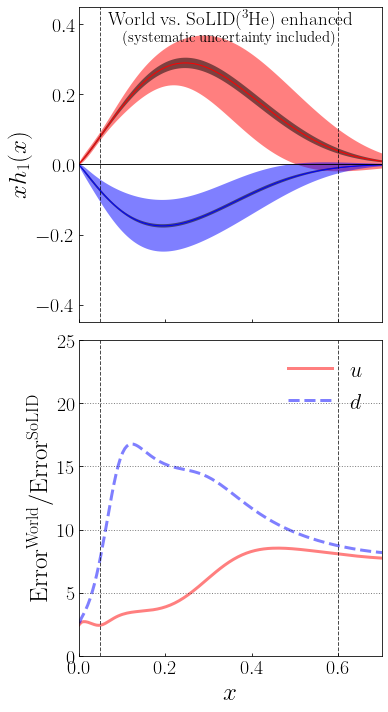

In [12]:
nrows, ncols = 2, 1

fig = plt.figure(figsize=(ncols*5.5,nrows*5))

data1, data2 = h1['world'], h1['enhanced3hesyst']
ylabel = r'$\rm Error^{World}/Error^{SoLID}$'
title1 = r'$\rm World~vs.~SoLID(^{3}He)~enhanced$'
title2 = r'$\rm (systematic~uncertainty~included)$'

ax = fig.add_subplot(nrows, ncols, 1)
ax.fill_between(data1['x'], data1['xu']-data1['Exu'], data1['xu']+data1['Exu'],\
               color='red', alpha=0.5, linewidth=0)
ax.fill_between(data1['x'], data1['xd']-data1['Exd'], data1['xd']+data1['Exd'],\
               color='blue', alpha=0.5, linewidth=0)
ax.fill_between(data2['x'], data2['xu']-data2['Exu'], data2['xu']+data2['Exu'],\
               color='black', alpha=0.5, linewidth=0)
ax.fill_between(data2['x'], data2['xd']-data2['Exd'], data2['xd']+data2['Exd'],\
               color='black', alpha=0.5, linewidth=0)
ax.plot(data2['x'], data2['xu'], color='red', linewidth=1)
ax.plot(data2['x'], data2['xd'], color='blue', linewidth=1)
ax.axhline(y=0, linestyle='-', color='black', alpha=0.9, linewidth=1)
ax.axvline(x=0.05, linestyle='--', color='black', alpha=0.7, linewidth=1)
ax.axvline(x=0.60, linestyle='--', color='black', alpha=0.7, linewidth=1)
ax.set_ylabel(r'$xh_1(x)$', size=25)
ax.set_xlim(0,0.7)
ax.set_ylim(-0.45,0.45)
#ax.set_xticks([0,0.2,0.4,0.6,0.8,1.0])
ax.set_xticklabels([])
ax.tick_params(axis='both', which='both', direction='in', labelsize=20)
ax.text(0.5, 0.96, title1, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=19)
ax.text(0.5, 0.90, title2, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=15)


ax = fig.add_subplot(nrows, ncols, 2)
ax.plot(data1['x'], data1['Exu']/data2['Exu'], color='red', alpha=0.5, linestyle='-', linewidth=3, label=r'$u$')
ax.plot(data1['x'], data1['Exd']/data2['Exd'], color='blue', alpha=0.5, linestyle='--', linewidth=3, label=r'$d$')
ax.axhline(y=5, linestyle=':', color='black', alpha=0.5, linewidth=1)
ax.axhline(y=10, linestyle=':', color='black', alpha=0.5, linewidth=1)
ax.axhline(y=15, linestyle=':', color='black', alpha=0.5, linewidth=1)
ax.axhline(y=20, linestyle=':', color='black', alpha=0.5, linewidth=1)
ax.axvline(x=0.05, linestyle='--', color='black', alpha=0.7, linewidth=1)
ax.axvline(x=0.60, linestyle='--', color='black', alpha=0.7, linewidth=1)
ax.set_xlabel(r'$x$', size=25)
ax.set_ylabel(ylabel, size=25)
ax.set_xlim(0,0.7)
ax.set_ylim(0,25)
#ax.set_xticks([0,0.2,0.4,0.6,0.8,1.0])
ax.tick_params(axis='both', which='both', direction='in', labelsize=20)
ax.legend(loc='upper right', frameon=False, fontsize=22)

fig.tight_layout()
fig.savefig('gallary/trans-world-enhanced3hesyst.pdf')

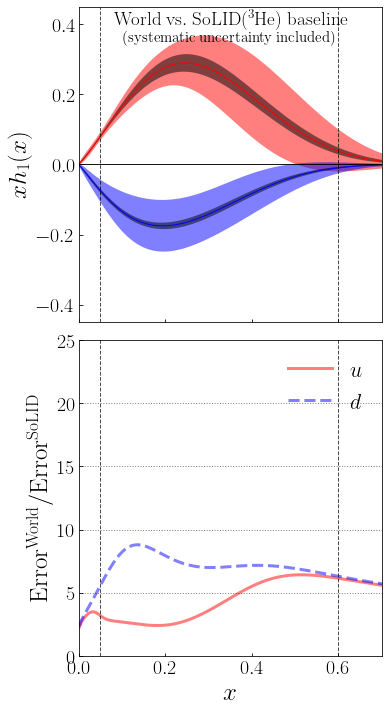

In [13]:
nrows, ncols = 2, 1

fig = plt.figure(figsize=(ncols*5.5,nrows*5))

data1, data2 = h1['world'], h1['base3hesyst']
ylabel = r'$\rm Error^{World}/Error^{SoLID}$'
title1 = r'$\rm World~vs.~SoLID(^{3}He)~baseline$'
title2 = r'$\rm (systematic~uncertainty~included)$'

ax = fig.add_subplot(nrows, ncols, 1)
ax.fill_between(data1['x'], data1['xu']-data1['Exu'], data1['xu']+data1['Exu'],\
               color='red', alpha=0.5, linewidth=0)
ax.fill_between(data1['x'], data1['xd']-data1['Exd'], data1['xd']+data1['Exd'],\
               color='blue', alpha=0.5, linewidth=0)
ax.fill_between(data2['x'], data2['xu']-data2['Exu'], data2['xu']+data2['Exu'],\
               color='black', alpha=0.5, linewidth=0)
ax.fill_between(data2['x'], data2['xd']-data2['Exd'], data2['xd']+data2['Exd'],\
               color='black', alpha=0.5, linewidth=0)
ax.plot(data2['x'], data2['xu'], color='red', linewidth=1)
ax.plot(data2['x'], data2['xd'], color='blue', linewidth=1)
ax.axhline(y=0, linestyle='-', color='black', alpha=0.9, linewidth=1)
ax.axvline(x=0.05, linestyle='--', color='black', alpha=0.7, linewidth=1)
ax.axvline(x=0.60, linestyle='--', color='black', alpha=0.7, linewidth=1)
ax.set_ylabel(r'$xh_1(x)$', size=25)
ax.set_xlim(0,0.7)
ax.set_ylim(-0.45,0.45)
#ax.set_xticks([0,0.2,0.4,0.6,0.8,1.0])
ax.set_xticklabels([])
ax.tick_params(axis='both', which='both', direction='in', labelsize=20)
ax.text(0.5, 0.96, title1, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=19)
ax.text(0.5, 0.90, title2, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=15)


ax = fig.add_subplot(nrows, ncols, 2)
ax.plot(data1['x'], data1['Exu']/data2['Exu'], color='red', alpha=0.5, linestyle='-', linewidth=3, label=r'$u$')
ax.plot(data1['x'], data1['Exd']/data2['Exd'], color='blue', alpha=0.5, linestyle='--', linewidth=3, label=r'$d$')
ax.axhline(y=5, linestyle=':', color='black', alpha=0.5, linewidth=1)
ax.axhline(y=10, linestyle=':', color='black', alpha=0.5, linewidth=1)
ax.axhline(y=15, linestyle=':', color='black', alpha=0.5, linewidth=1)
ax.axhline(y=20, linestyle=':', color='black', alpha=0.5, linewidth=1)
ax.axvline(x=0.05, linestyle='--', color='black', alpha=0.7, linewidth=1)
ax.axvline(x=0.60, linestyle='--', color='black', alpha=0.7, linewidth=1)
ax.set_xlabel(r'$x$', size=25)
ax.set_ylabel(ylabel, size=25)
ax.set_xlim(0,0.7)
ax.set_ylim(0,25)
#ax.set_xticks([0,0.2,0.4,0.6,0.8,1.0])
ax.tick_params(axis='both', which='both', direction='in', labelsize=20)
ax.legend(loc='upper right', frameon=False, fontsize=22)

fig.tight_layout()
fig.savefig('gallary/trans-world-base3hesyst.pdf')

# Calculate tensor charge

In [5]:
def gtcalc(pset,Q2,tol):
    gu = []
    gd = []
    gt = []
    for i in range(len(pset)):
        tmp = tmd.gt(Q2,pset.loc[i])
        gu.append(tmp['u'])
        gd.append(tmp['d'])
        gt.append(tmp['u-d'])
    return {'u':np.mean(gu),'Eu':np.std(gu)*tol,'d':np.mean(gd),'Ed':np.std(gd)*tol,'u-d':np.mean(gt),'Eu-d':np.std(gt)*tol}
 

In [6]:
def gttruncate(pset,Q2,tol):
    xl = 0.05
    xu = 0.6
    gu = []
    gd = []
    gt = []
    for i in range(len(pset)):
        tmp = tmd.gt(Q2,pset.loc[i],xl,xu)
        gu.append(tmp['u'])
        gd.append(tmp['d'])
        gt.append(tmp['u-d'])
    return {'u':np.mean(gu),'Eu':np.std(gu)*tol,'d':np.mean(gd),'Ed':np.std(gd)*tol,'u-d':np.mean(gt),'Eu-d':np.std(gt)*tol}
 

In [7]:
Q2 = 2.4
tol = 7.04

gt = {}
gt['world'] = gtcalc(par['world'],Q2,tol)
gt['sbs+clas'] = gtcalc(par['sbs+clas'],Q2,tol)
gt['base'] = gtcalc(par['base'],Q2,tol)
gt['basesyst'] = gtcalc(par['basesyst'],Q2,tol)
gt['enhanced'] = gtcalc(par['enhanced'],Q2,tol)
gt['enhancedsyst'] = gtcalc(par['enhancedsyst'],Q2,tol)
gt['base3he'] = gtcalc(par['base3he'],Q2,tol)
gt['base3hesyst'] = gtcalc(par['base3hesyst'],Q2,tol)
gt['enhanced3he'] = gtcalc(par['enhanced3he'],Q2,tol)
gt['enhanced3hesyst'] = gtcalc(par['enhanced3hesyst'],Q2,tol)


In [8]:
Q2 = 2.4
tol = 7.04

gtt = {}
gtt['world'] = gttruncate(par['world'],Q2,tol)
gtt['sbs+clas'] = gttruncate(par['sbs+clas'],Q2,tol)
gtt['base'] = gttruncate(par['base'],Q2,tol)
gtt['basesyst'] = gttruncate(par['basesyst'],Q2,tol)
gtt['enhanced'] = gttruncate(par['enhanced'],Q2,tol)
gtt['enhancedsyst'] = gttruncate(par['enhancedsyst'],Q2,tol)
gtt['base3he'] = gttruncate(par['base3he'],Q2,tol)
gtt['base3hesyst'] = gttruncate(par['base3hesyst'],Q2,tol)
gtt['enhanced3he'] = gttruncate(par['enhanced3he'],Q2,tol)
gtt['enhanced3hesyst'] = gttruncate(par['enhanced3hesyst'],Q2,tol)


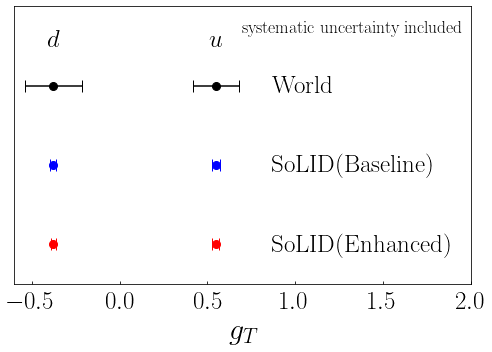

In [12]:
nrows, ncols = 1, 1

fig = plt.figure(figsize = (ncols * 7, nrows * 5))
ax = fig.add_subplot(nrows, ncols, 1)

ax.errorbar(gt['world']['u'], 0, xerr=gt['world']['Eu'], marker='o', color='black', markersize=8, capsize=6)
ax.errorbar(gt['world']['d'], 0, xerr=gt['world']['Ed'], marker='o', color='black', markersize=8, capsize=6)

ax.errorbar(gt['basesyst']['u'], -1, xerr=gt['basesyst']['Eu'], marker='o', color='blue', markersize=8, capsize=6)
ax.errorbar(gt['basesyst']['d'], -1, xerr=gt['basesyst']['Ed'], marker='o', color='blue', markersize=8, capsize=6)
#
ax.errorbar(gt['enhancedsyst']['u'], -2, xerr=gt['enhancedsyst']['Eu'], marker='o', color='red', markersize=8, capsize=6)
ax.errorbar(gt['enhancedsyst']['d'], -2, xerr=gt['enhancedsyst']['Ed'], marker='o', color='red', markersize=8, capsize=6)

ax.set_xlim(-0.6, 2.0)
ax.set_ylim(-2.5, 1.)
ax.set_xlabel(r'$g_T$', size=30)
ax.tick_params(axis='both', which='both', direction='in', pad=6, labelsize=25)
ax.set_yticks([])

ax.text(gt['world']['u'], 0.5, r'$u$', fontsize = 25, horizontalalignment = 'center')
ax.text(gt['world']['d'], 0.5, r'$d$', fontsize = 25, horizontalalignment = 'center')

ax.text(0.87, 0, r'$\rm World$', fontsize = 25, horizontalalignment = 'left', verticalalignment = 'center')
ax.text(0.87, -1, r'$\rm SoLID(Baseline)$', fontsize = 25, horizontalalignment = 'left', verticalalignment = 'center')
ax.text(0.87, -2, r'$\rm SoLID(Enhanced)$', fontsize = 25, horizontalalignment = 'left', verticalalignment = 'center')
ax.text(0.70, 0.72, r'$\rm systematic~uncertainty~included$', fontsize = 17.5, horizontalalignment = 'left', verticalalignment = 'center')

fig.tight_layout()
fig.savefig('gallary/gt-world-base-enhanced.pdf')

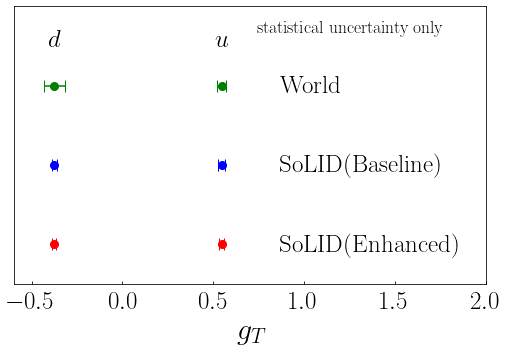

In [14]:
nrows, ncols = 1, 1

fig = plt.figure(figsize = (ncols * 7, nrows * 5))
ax = fig.add_subplot(nrows, ncols, 1)

ax.errorbar(gt['sbs+clas']['u'], 0, xerr=gt['sbs+clas']['Eu'], marker='o', color='green', markersize=8, capsize=6)
ax.errorbar(gt['sbs+clas']['d'], 0, xerr=gt['sbs+clas']['Ed'], marker='o', color='green', markersize=8, capsize=6)

ax.errorbar(gt['base']['u'], -1, xerr=gt['base']['Eu'], marker='o', color='blue', markersize=8, capsize=6)
ax.errorbar(gt['base']['d'], -1, xerr=gt['base']['Ed'], marker='o', color='blue', markersize=8, capsize=6)
#
ax.errorbar(gt['enhanced']['u'], -2, xerr=gt['enhanced']['Eu'], marker='o', color='red', markersize=8, capsize=6)
ax.errorbar(gt['enhanced']['d'], -2, xerr=gt['enhanced']['Ed'], marker='o', color='red', markersize=8, capsize=6)

ax.set_xlim(-0.6, 2.0)
ax.set_ylim(-2.5, 1.)
ax.set_xlabel(r'$g_T$', size=30)
ax.tick_params(axis='both', which='both', direction='in', pad=6, labelsize=25)
ax.set_yticks([])

ax.text(gt['world']['u'], 0.5, r'$u$', fontsize = 25, horizontalalignment = 'center')
ax.text(gt['world']['d'], 0.5, r'$d$', fontsize = 25, horizontalalignment = 'center')

ax.text(0.87, 0, r'$\rm World$', fontsize = 25, horizontalalignment = 'left', verticalalignment = 'center')
ax.text(0.87, -1, r'$\rm SoLID(Baseline)$', fontsize = 25, horizontalalignment = 'left', verticalalignment = 'center')
ax.text(0.87, -2, r'$\rm SoLID(Enhanced)$', fontsize = 25, horizontalalignment = 'left', verticalalignment = 'center')
ax.text(0.74, 0.72, r'$\rm statistical~uncertainty~only$', fontsize = 17.5, horizontalalignment = 'left', verticalalignment = 'center')

fig.tight_layout()
fig.savefig('gallary/gt-sbsclas-base-enhanced.pdf')

In [14]:
h1['sbs+clas'][h1['sbs+clas']['xu']==h1['sbs+clas']['xu'].max()]

,Exd,Exu,x,xd,xu
49,0.025631,0.016323,0.246985,-0.165223,0.289229


In [12]:
h1['sbs+clas+enhanced'][h1['sbs+clas+enhanced']['xu']==h1['sbs+clas+enhanced']['xu'].max()]

,Exd,Exu,x,xd,xu
49,0.003276,0.005782,0.246985,-0.165523,0.289446


In [13]:
h1['enhanced'][h1['enhanced']['xu']==h1['enhanced']['xu'].max()]

,Exd,Exu,x,xd,xu
49,0.003297,0.005316,0.246985,-0.165571,0.289473


In [16]:
h1['sbs+clas'][h1['sbs+clas']['xd']==h1['sbs+clas']['xd'].min()]

,Exd,Exu,x,xd,xu
38,0.028157,0.013975,0.191764,-0.174885,0.271693


In [17]:
h1['sbs+clas+enhanced'][h1['sbs+clas+enhanced']['xd']==h1['sbs+clas+enhanced']['xd'].min()]

,Exd,Exu,x,xd,xu
38,0.00303,0.005299,0.191764,-0.175145,0.271813


In [24]:
gt['enhancedsyst']

{'u': 0.5471252267431155,
 'Eu': 0.021053790126418247,
 'd': -0.3761270036515863,
 'Ed': 0.013747223997853282,
 'u-d': 0.9232522303947018,
 'Eu-d': 0.02716574750432432}

In [23]:
gt['enhanced']

{'u': 0.54664072361522,
 'Eu': 0.013309298503737618,
 'd': -0.3758902730510927,
 'Ed': 0.010011328835130576,
 'u-d': 0.9225309966663127,
 'Eu-d': 0.01949656377846205}

In [7]:
gtt['world']

{'u': 0.46753668487040256,
 'Eu': 0.10944655704981952,
 'd': -0.2988643856711898,
 'Ed': 0.12576198273411832,
 'u-d': 0.7664010705415923,
 'Eu-d': 0.16581423910468684}

In [6]:
gtt['enhancedsyst']

{'u': 0.46666561341461454,
 'Eu': 0.01635877177822831,
 'd': -0.2988087860809743,
 'Ed': 0.006049280514364938,
 'u-d': 0.7654743994955886,
 'Eu-d': 0.015342134684755957}

In [8]:
gtt['enhanced']

{'u': 0.4660982318586581,
 'Eu': 0.008795150628557282,
 'd': -0.2984771144392932,
 'Ed': 0.004791856647190722,
 'u-d': 0.7645753462979513,
 'Eu-d': 0.008948845540617523}

In [10]:
gtt['enhanced3hesyst']

{'u': 0.4659995321527078,
 'Eu': 0.022754194548633585,
 'd': -0.2985387739243964,
 'Ed': 0.007514051967050195,
 'u-d': 0.7645383060771043,
 'Eu-d': 0.022912027259012705}

In [13]:
gt['base3hesyst']

{'u': 0.5466016567402017,
 'Eu': 0.033633811041429665,
 'd': -0.3758315459724759,
 'Ed': 0.023431657973141458,
 'u-d': 0.9224332027126776,
 'Eu-d': 0.03730659676279136}

In [15]:
gtt['base3hesyst']

{'u': 0.46629565669042417,
 'Eu': 0.03312817279131246,
 'd': -0.2986713854483749,
 'Ed': 0.015041741964342601,
 'u-d': 0.764967042138799,
 'Eu-d': 0.03521617207664608}

In [16]:
gt['enhanced3he']

{'u': 0.547078729171395,
 'Eu': 0.016493628743614566,
 'd': -0.3762437697775712,
 'Ed': 0.012248291659526699,
 'u-d': 0.923322498948966,
 'Eu-d': 0.02275749436773658}

In [17]:
gt['enhanced3hesyst']

{'u': 0.5462834473961012,
 'Eu': 0.027148902003506052,
 'd': -0.37572595863081454,
 'Ed': 0.01664335105331098,
 'u-d': 0.9220094060269157,
 'Eu-d': 0.03392276194594411}

In [18]:
gtt['enhanced3he']

{'u': 0.4665634795245279,
 'Eu': 0.012452240371575884,
 'd': -0.2988555854886264,
 'Ed': 0.005432127529896227,
 'u-d': 0.765419065013154,
 'Eu-d': 0.011847869082463953}

In [19]:
gtt['enhanced3hesyst']

{'u': 0.4659995321527078,
 'Eu': 0.022754194548633585,
 'd': -0.2985387739243964,
 'Ed': 0.007514051967050195,
 'u-d': 0.7645383060771043,
 'Eu-d': 0.022912027259012705}

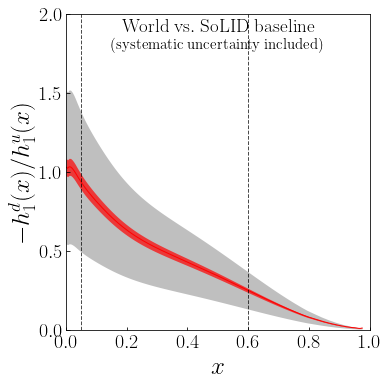

In [18]:
nrows, ncols = 2, 1

fig = plt.figure(figsize=(ncols*5.5,nrows*5))

data1, data2 = h1['world'], h1['basesyst']
ylabel = r'$\rm Error^{World}/Error^{SoLID}$'
title1 = r'$\rm World~vs.~SoLID~baseline$'
title2 = r'$\rm (systematic~uncertainty~included)$'

ax = fig.add_subplot(nrows, ncols, 1)
ax.fill_between(data1['x'], -data1['d/u']-data1['Ed/u'], -data1['d/u']+data1['Ed/u'],\
               color='gray', alpha=0.5, linewidth=0)
ax.fill_between(data2['x'], -data2['d/u']-data2['Ed/u'], -data2['d/u']+data2['Ed/u'],\
               color='red', alpha=0.7, linewidth=0)
ax.plot(data2['x'], -data2['d/u'], color='red', linewidth=1)
ax.axhline(y=0, linestyle='-', color='black', alpha=0.9, linewidth=1)
ax.axvline(x=0.05, linestyle='--', color='black', alpha=0.7, linewidth=1)
ax.axvline(x=0.60, linestyle='--', color='black', alpha=0.7, linewidth=1)
ax.set_xlabel(r'$x$', size=25)
ax.set_ylabel(r'$-h_1^d(x)/h_1^u(x)$', size=25)
ax.set_xlim(0,1)
ax.set_ylim(0,2)
#ax.set_xticks([0,0.2,0.4,0.6,0.8,1.0])
#ax.set_xticklabels([])
ax.tick_params(axis='both', which='both', direction='in', labelsize=20)
ax.text(0.5, 0.96, title1, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=19)
ax.text(0.5, 0.90, title2, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=15)

fig.tight_layout()
fig.savefig('gallary/trans-doveru-world-basesyst.pdf')

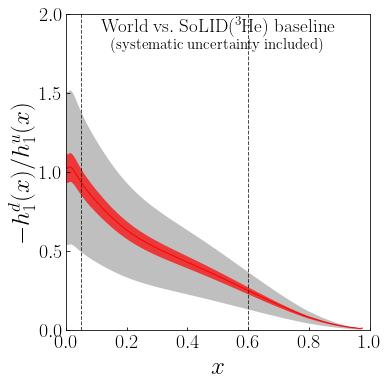

In [20]:
nrows, ncols = 2, 1

fig = plt.figure(figsize=(ncols*5.5,nrows*5))

data1, data2 = h1['world'], h1['base3hesyst']
ylabel = r'$\rm Error^{World}/Error^{SoLID}$'
title1 = r'$\rm World~vs.~SoLID(^{3}He)~baseline$'
title2 = r'$\rm (systematic~uncertainty~included)$'

ax = fig.add_subplot(nrows, ncols, 1)
ax.fill_between(data1['x'], -data1['d/u']-data1['Ed/u'], -data1['d/u']+data1['Ed/u'],\
               color='gray', alpha=0.5, linewidth=0)
ax.fill_between(data2['x'], -data2['d/u']-data2['Ed/u'], -data2['d/u']+data2['Ed/u'],\
               color='red', alpha=0.7, linewidth=0)
ax.plot(data2['x'], -data2['d/u'], color='red', linewidth=1)
ax.axhline(y=0, linestyle='-', color='black', alpha=0.9, linewidth=1)
ax.axvline(x=0.05, linestyle='--', color='black', alpha=0.7, linewidth=1)
ax.axvline(x=0.60, linestyle='--', color='black', alpha=0.7, linewidth=1)
ax.set_xlabel(r'$x$', size=25)
ax.set_ylabel(r'$-h_1^d(x)/h_1^u(x)$', size=25)
ax.set_xlim(0,1)
ax.set_ylim(0,2)
#ax.set_xticks([0,0.2,0.4,0.6,0.8,1.0])
#ax.set_xticklabels([])
ax.tick_params(axis='both', which='both', direction='in', labelsize=20)
ax.text(0.5, 0.96, title1, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=19)
ax.text(0.5, 0.90, title2, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=15)

fig.tight_layout()
fig.savefig('gallary/trans-doveru-world-base3hesyst.pdf')

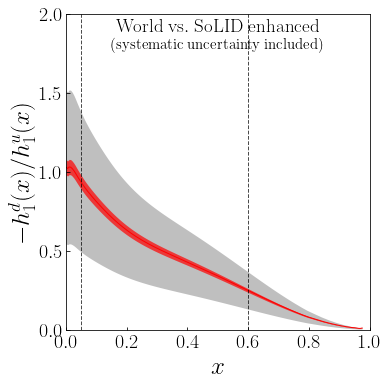

In [22]:
nrows, ncols = 2, 1

fig = plt.figure(figsize=(ncols*5.5,nrows*5))

data1, data2 = h1['world'], h1['enhancedsyst']
ylabel = r'$\rm Error^{World}/Error^{SoLID}$'
title1 = r'$\rm World~vs.~SoLID~enhanced$'
title2 = r'$\rm (systematic~uncertainty~included)$'

ax = fig.add_subplot(nrows, ncols, 1)
ax.fill_between(data1['x'], -data1['d/u']-data1['Ed/u'], -data1['d/u']+data1['Ed/u'],\
               color='gray', alpha=0.5, linewidth=0)
ax.fill_between(data2['x'], -data2['d/u']-data2['Ed/u'], -data2['d/u']+data2['Ed/u'],\
               color='red', alpha=0.7, linewidth=0)
ax.plot(data2['x'], -data2['d/u'], color='red', linewidth=1)
ax.axhline(y=0, linestyle='-', color='black', alpha=0.9, linewidth=1)
ax.axvline(x=0.05, linestyle='--', color='black', alpha=0.7, linewidth=1)
ax.axvline(x=0.60, linestyle='--', color='black', alpha=0.7, linewidth=1)
ax.set_xlabel(r'$x$', size=25)
ax.set_ylabel(r'$-h_1^d(x)/h_1^u(x)$', size=25)
ax.set_xlim(0,1)
ax.set_ylim(0,2)
#ax.set_xticks([0,0.2,0.4,0.6,0.8,1.0])
#ax.set_xticklabels([])
ax.tick_params(axis='both', which='both', direction='in', labelsize=20)
ax.text(0.5, 0.96, title1, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=19)
ax.text(0.5, 0.90, title2, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=15)

fig.tight_layout()
fig.savefig('gallary/trans-doveru-world-enhancedsyst.pdf')

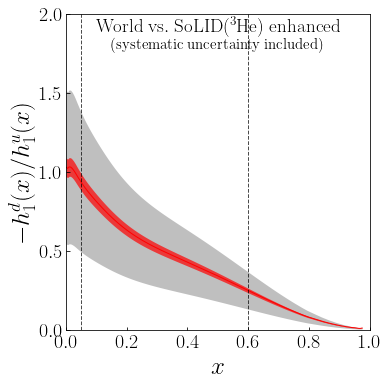

In [23]:
nrows, ncols = 2, 1

fig = plt.figure(figsize=(ncols*5.5,nrows*5))

data1, data2 = h1['world'], h1['enhanced3hesyst']
ylabel = r'$\rm Error^{World}/Error^{SoLID}$'
title1 = r'$\rm World~vs.~SoLID(^{3}He)~enhanced$'
title2 = r'$\rm (systematic~uncertainty~included)$'

ax = fig.add_subplot(nrows, ncols, 1)
ax.fill_between(data1['x'], -data1['d/u']-data1['Ed/u'], -data1['d/u']+data1['Ed/u'],\
               color='gray', alpha=0.5, linewidth=0)
ax.fill_between(data2['x'], -data2['d/u']-data2['Ed/u'], -data2['d/u']+data2['Ed/u'],\
               color='red', alpha=0.7, linewidth=0)
ax.plot(data2['x'], -data2['d/u'], color='red', linewidth=1)
ax.axhline(y=0, linestyle='-', color='black', alpha=0.9, linewidth=1)
ax.axvline(x=0.05, linestyle='--', color='black', alpha=0.7, linewidth=1)
ax.axvline(x=0.60, linestyle='--', color='black', alpha=0.7, linewidth=1)
ax.set_xlabel(r'$x$', size=25)
ax.set_ylabel(r'$-h_1^d(x)/h_1^u(x)$', size=25)
ax.set_xlim(0,1)
ax.set_ylim(0,2)
#ax.set_xticks([0,0.2,0.4,0.6,0.8,1.0])
#ax.set_xticklabels([])
ax.tick_params(axis='both', which='both', direction='in', labelsize=20)
ax.text(0.5, 0.96, title1, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=19)
ax.text(0.5, 0.90, title2, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=15)

fig.tight_layout()
fig.savefig('gallary/trans-doveru-world-enhanced3hesyst.pdf')